<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/06.01-Empirical-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical gain tuning

This notebook were inspired in this video.

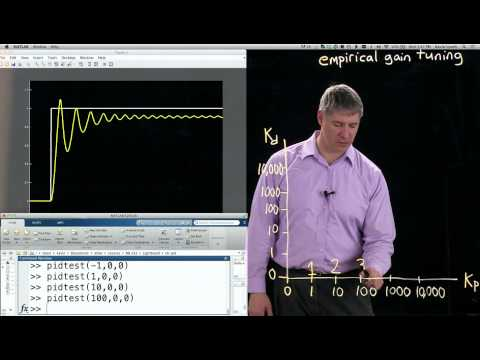

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('uXnDwojRb1g')

## Summary

Let's try to empirical tune an ideal PID controller of a servo control loop with a plant modelled as a second order system. 

In order to make the things simpler, let's assume $G_a(s) = G_m(s) = 1$.

## Initializations

In [1]:
from requests import get
!pip install control
from inspect import getsource

# Tip: https://changhsinlee.com/colab-import-python/
url = 'https://raw.githubusercontent.com/gmxavier/FAT0413150/main/src/utils.py'
r = get(url)
with open('utils.py', 'w') as f:
    f.write(r.text)

from utils import pidtest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 5.3 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=bcefd5f0337b1669a37e217e51c7e3d3b37b016b22baa2f12be52bcd742782e1
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


## Simulation function

We wrapped the simulation and plot processes in the `pidtest` function:

In [2]:
print(getsource(pidtest))

def pidtest(Kp, Ki, Kd, 
            N     = 10,
            num   = [1e-1],
            den   = [20**2, 2*0.5*20, 1],
            theta = 0,
            tpar  = [0, 10*20, 1000, 25], #start, stop, N, t0
            test  = True,
            out   = False):
    r'''Simulates a servo loop with a plant and a PID controller (filtered derivative) and an open 
    loop for process reaction curve data.

    Parameters
    ----------
    Kp : float
         Proportional gain, [-] 
    Ki : float
         Integral gain, [1/time]   
    Kd : float
         Derivative gain, [time] 
    N  : float
         Derivative filter factor [-]
    num : array
         Plant transfer function numerator coefficients        
    den : array
         Plant transfer function denominator coefficients        
    theta : float
         Plant dead time, [time]
    tpar : array
         Time parameters (start time, stop time, samples number and step time)
    test : boolean
         If test = True, it returns the 

## Tuning process

Similiar to the inspirational video, let's first try a PID controller with only the P action and $K_p = -1$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


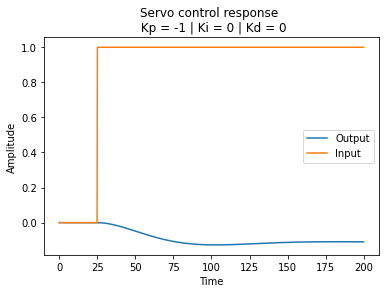

In [3]:
pidtest(-1,0,0) # run 0

It's clear that the controller gain choosen has the wrong sign. 

It must have a positive sign instead of a negative one. Let's correct the sign and try again.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


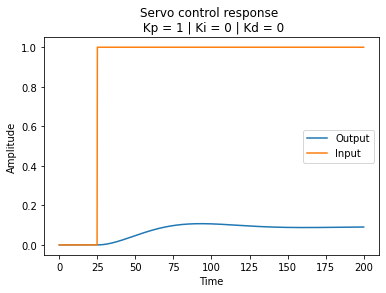

In [4]:
pidtest(1,0,0) # run 1

The offset is to high! Let's increase the P action gain one order of magnitude and see what happens.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


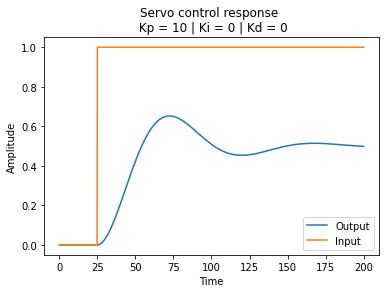

In [5]:
pidtest(10,0,0) # run 2

The offset was reduced, but it is almost 50% yet. Let's increase the P action gain one order of magnitude again and see what happens.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


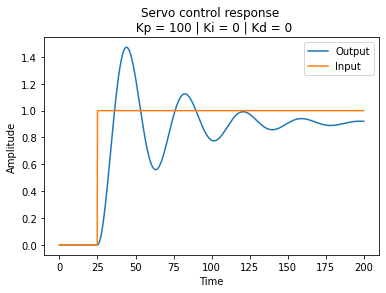

In [6]:
pidtest(100,0,0) # run 3

The offset was reduced again (as the theory tells us) and now it is only 10%. 

Let's increase the P action gain one order of magnitude again and see what happens.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


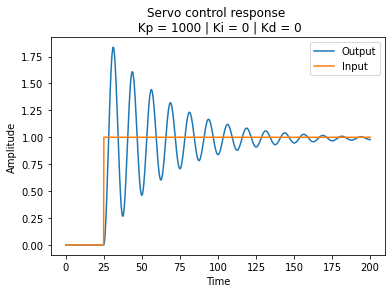

In [7]:
pidtest(1000,0,0) # run 4

The offset is nearly 0%, but this reduction came with a lot of oscillation and an overshoot of more than 75%. 

Let's back to the earlier value of the P action and try to improve the performance by using the D action.

Now, let's do the same process with the D action gain starting with $K_d = 1$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


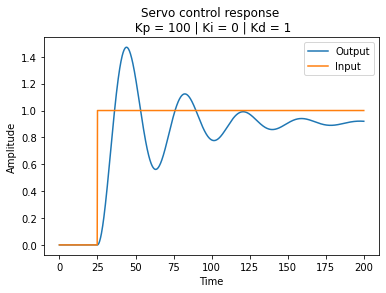

In [8]:
pidtest(100,0,1) # run 5

We need more damping, let's try increase the D action gain one order of magnitude.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


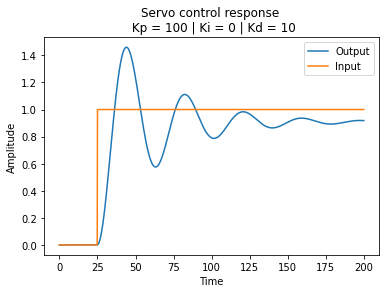

In [9]:
pidtest(100,0,10) # run 6

More damping, please!

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


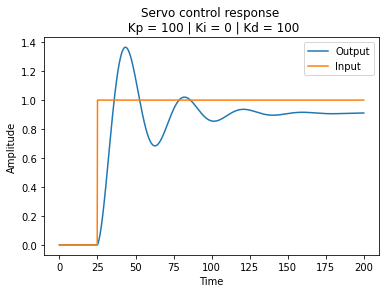

In [10]:
pidtest(100,0,100) # run 7

More damping again, please!

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


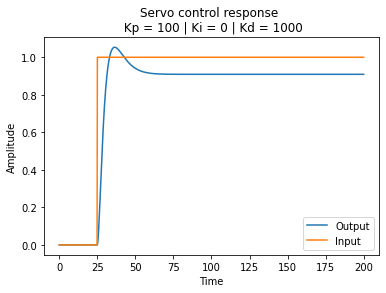

In [11]:
pidtest(100,0,1000) # run 8

Just a bit more damping.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


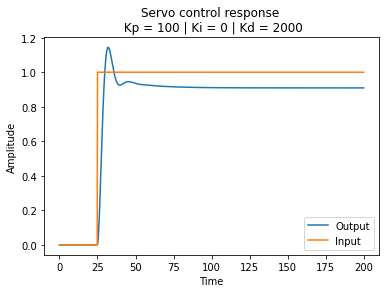

In [12]:
pidtest(100,0,2000) # run 9

The theory also tell us that neither P action or D action alone or even combined are able to eliminate offset. 

So, we will need the I action in order to get rid of this offset.

Now, let's do the same process with the I action gain starting with $K_i = 1$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


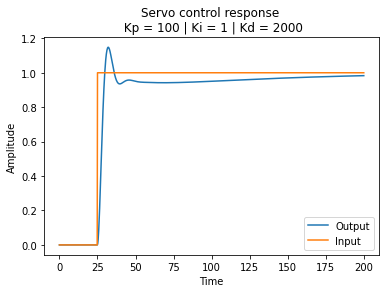

In [13]:
pidtest(100,1,2000) # run 10

Not enough I action, let's increase it.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


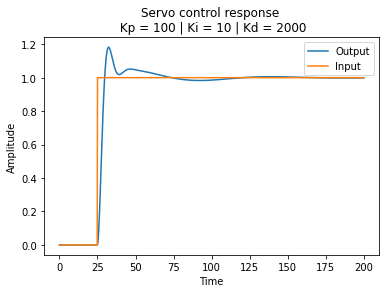

In [14]:
pidtest(100,10,2000) # run 11

The offset was eliminated, but what will happen if we increase more the I action?

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


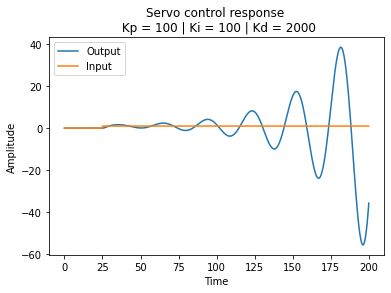

In [15]:
pidtest(100,100,2000) # run 12

Ops! Something thing really bad happens, didn't it? 

The control loop becames unstable due too much I action. 

Let's move back to the earlier I action gain value, but reducing it by half in order to eliminate the small overshoot observed.

In another words, let's try $K_i = 5$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


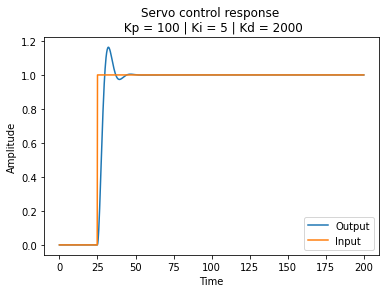

In [22]:
pidtest(100,5,2000) # run 13

Wunderbar! We achieve a fast closed loop response with no overshoot!

The PID tuning settings from our empirical tuning process are $K_p = 100$, $K_i = 5$ and $K_d = 2000$.

Let's zooming the closed loop response to see in detail how fast it is.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


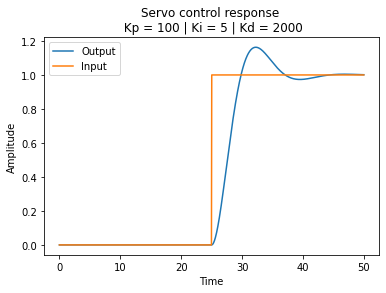

In [23]:
pidtest(100,5,2000,tpar=[0, 50, 1000, 25])